In [522]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [523]:
df = pd.read_csv(r"C:\Users\swapn\Downloads\ML\ML\uber.csv")

In [524]:
df.head(5)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [526]:
df.drop(columns=["Unnamed: 0","key"],inplace=True)
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [527]:
df = df.assign(hour = df.pickup_datetime.dt.hour, day = df.pickup_datetime.dt.day, month = df.pickup_datetime.dt.month)
df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5


In [528]:
df = df.drop("pickup_datetime",axis=1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5


In [529]:
print(df.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
dtype: int64


In [530]:
df = df.dropna()

In [531]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
dtype: int64

<Axes: xlabel='fare_amount'>

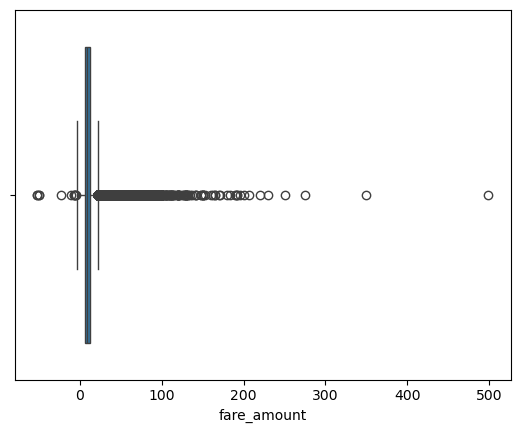

In [532]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['fare_amount'])
# plt.show()

<Axes: xlabel='passenger_count'>

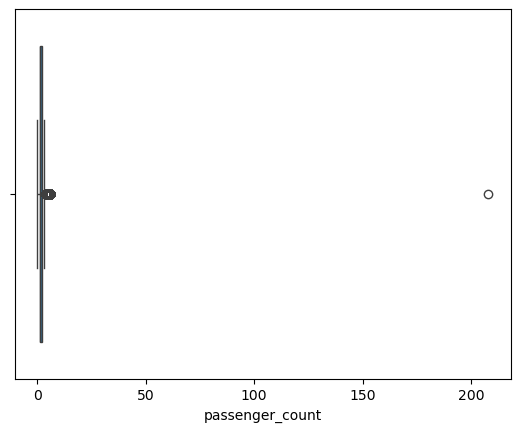

In [533]:
# plt.figure(figsize=(8,4))
sns.boxplot(x = df['passenger_count'])
# plt.show()

In [534]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column],lower_bound,upper_bound)
    return df

def treat_outliers_all(df1,col_list):
    for c in col_list:
        df1 = remove_outliers(df,c)
    return df1

In [535]:
def haversine(lon1,lat1,lon2,lat2):
    R = 6371 # earth's radius in km
    lon1,lon2 = np.radians(lon1),np.radians(lon2)
    lat1,lat2 = np.radians(lat1),np.radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))

    return R * c

df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                         df['dropoff_longitude'], df['dropoff_latitude'])

C:\Users\swapn\AppData\Local\Temp\ipykernel_9508\3514442834.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],


C:\Users\swapn\AppData\Local\Temp\ipykernel_9508\3035601590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.clip(df[column],lower_bound,upper_bound)
C:\Users\swapn\AppData\Local\Temp\ipykernel_9508\3035601590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.clip(df[column],lower_bound,upper_bound)
C:\Users\swapn\AppData\Local\Temp\ipykernel_9508\3035601590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
distance             Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

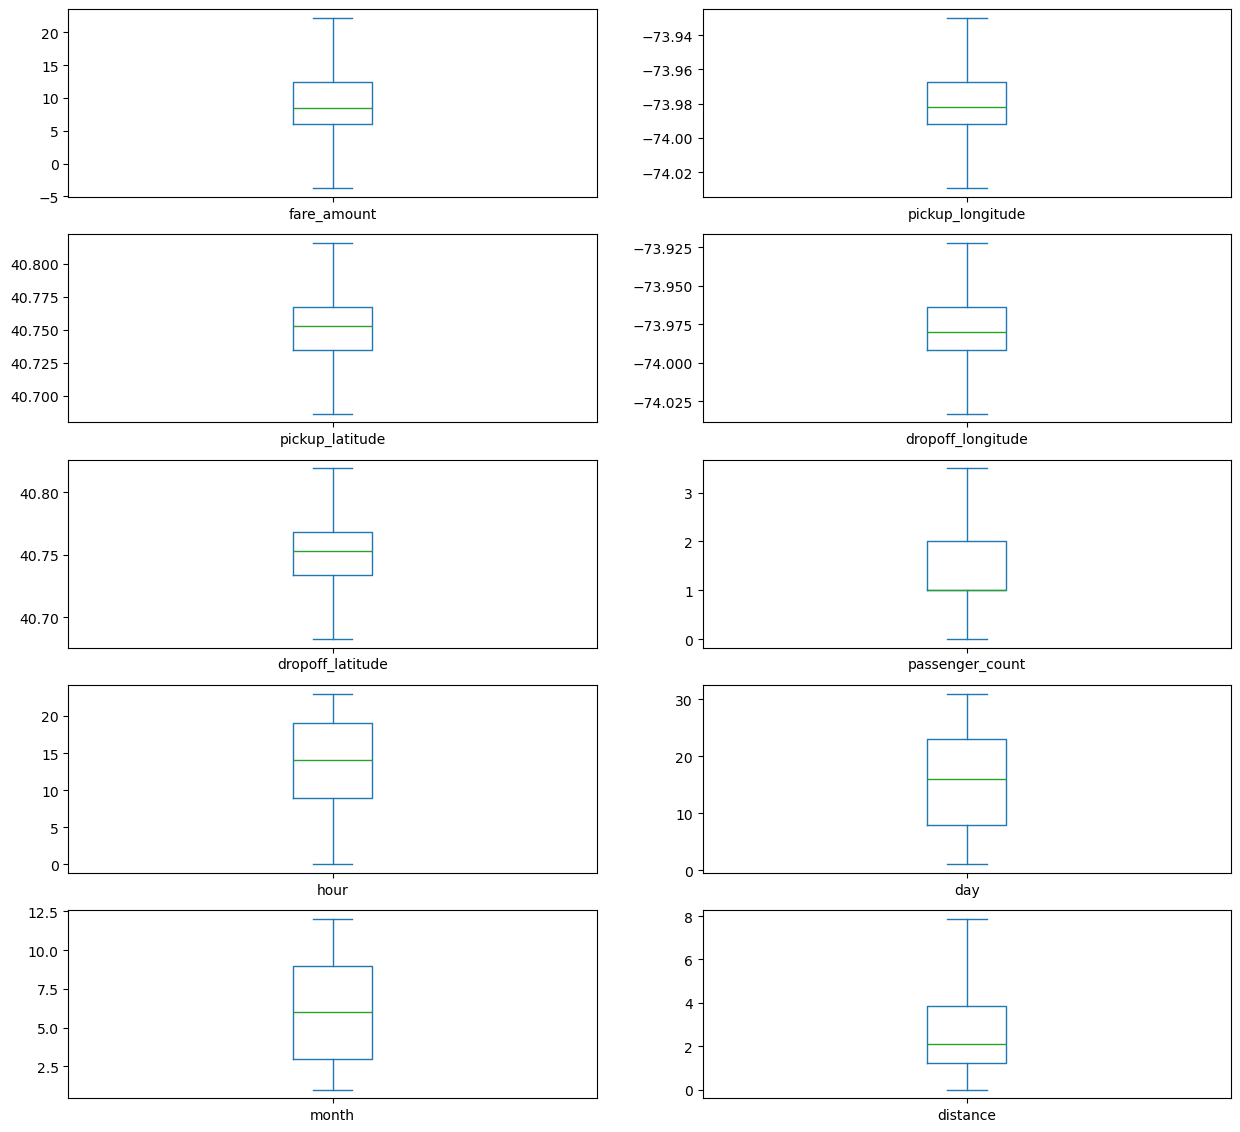

In [536]:
df = treat_outliers_all(df,df.iloc[:,0::])
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

<Axes: >

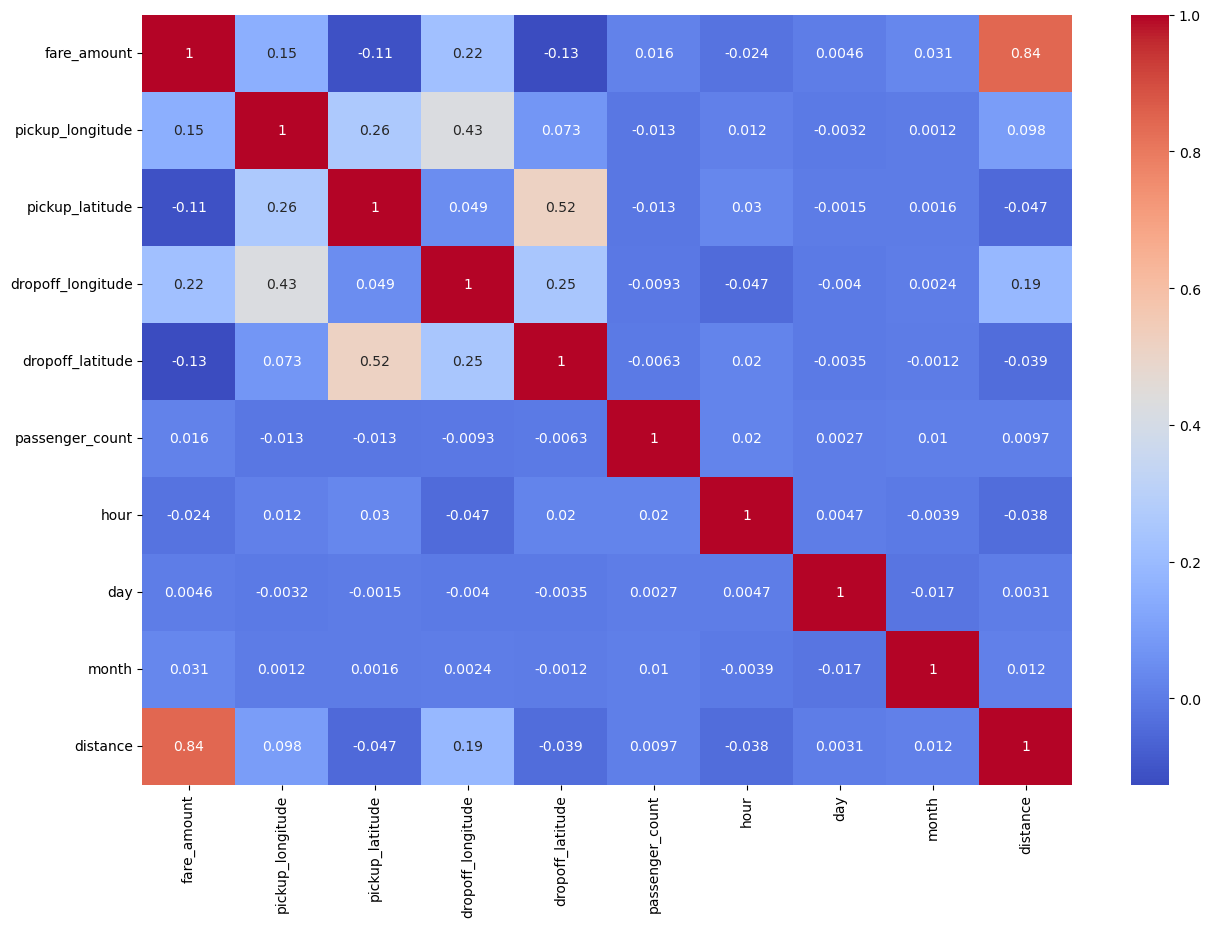

In [537]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [565]:
X = df[['distance','passenger_count']]
y = df['fare_amount']

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [569]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [571]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Train and evaluate Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("\nModel Evaluation Metrics:")
print("-" * 50)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
print("\nRandom Forest Feature Importance:")
print(feature_importance.sort_values(by='importance', ascending=False))


Model Evaluation Metrics:
--------------------------------------------------
Linear Regression - RMSE: 2.9963, R2: 0.6974
Random Forest - RMSE: 3.1575, R2: 0.6639

Random Forest Feature Importance:
           feature  importance
0         distance    0.988151
1  passenger_count    0.011849
